In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

# conda install conda-forge::yellowbrick
from yellowbrick.classifier import confusion_matrix

# Not being used, just to fix Yellowbrick's fonts missing bug
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"

In [2]:
base = pd.read_csv("data/insurance.csv")

base.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [3]:
base.shape

(20000, 28)

In [4]:
base.drop(columns=["Unnamed: 0"], inplace=True)

base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [5]:
base.isna().sum()

GoodStudent         0
Age                 0
SocioEcon           0
RiskAversion        0
VehicleYear         0
ThisCarDam      14681
RuggedAuto          0
Accident        14336
MakeModel           0
DrivQuality         0
Mileage             0
Antilock            0
DrivingSkill        0
SeniorTrain         0
ThisCarCost         0
Theft               0
CarValue            0
HomeBase            0
AntiTheft           0
PropCost            0
OtherCarCost        0
OtherCar            0
MedCost             0
Cushioning          0
Airbag              0
ILiCost             0
DrivHist            0
dtype: int64

In [6]:
base.replace(np.nan, "None", inplace=True)

base.isna().sum()

GoodStudent     0
Age             0
SocioEcon       0
RiskAversion    0
VehicleYear     0
ThisCarDam      0
RuggedAuto      0
Accident        0
MakeModel       0
DrivQuality     0
Mileage         0
Antilock        0
DrivingSkill    0
SeniorTrain     0
ThisCarCost     0
Theft           0
CarValue        0
HomeBase        0
AntiTheft       0
PropCost        0
OtherCarCost    0
OtherCar        0
MedCost         0
Cushioning      0
Airbag          0
ILiCost         0
DrivHist        0
dtype: int64

In [7]:
base.head(10)

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,Poor,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many
8,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,HundredThou,TenThou,False,TenThou,Poor,False,Thousand,Many
9,True,Adolescent,Prole,Cautious,Older,Severe,Football,Severe,FamilySedan,Poor,...,City,True,HundredThou,HundredThou,True,Thousand,Good,False,Thousand,Many


In [8]:
y = base.iloc[:, 7].values

X = pd.concat([base.iloc[:, 0:6], base.iloc[:, 8:]], axis=1)

X = X.values

In [9]:
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [10]:
labelEncoder = LabelEncoder()

In [11]:
X.shape

(20000, 25)

In [12]:
for i in range(0, X.shape[1]):
    if X[:, i].dtype == "object":
        X[:, i] = labelEncoder.fit_transform(X[:, i])

X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], dtype=object)

In [13]:
# X independent variables
# y dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
modelo = GaussianNB()

modelo.fit(X_train, y_train)

GaussianNB()

In [15]:
previsoes = modelo.predict(X_test)

previsoes

array(['None', 'None', 'None', ..., 'None', 'Mild', 'None'], dtype='<U8')

In [16]:
accuracy_score(y_test, previsoes)

0.8383333333333334

In [17]:
precision_score(y_test, previsoes, average=None)

array([0.6862069 , 0.35142857, 0.97525439, 1.        ])

In [18]:
recall_score(y_test, previsoes, average="weighted")

0.8383333333333334

In [19]:
f1_score(y_test, previsoes, average="weighted")

0.8133943084486028

In [20]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

        Mild       0.69      0.73      0.71       542
    Moderate       0.35      0.73      0.47       505
        None       0.98      1.00      0.99      4228
      Severe       1.00      0.06      0.12       725

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.57      6000
weighted avg       0.90      0.84      0.81      6000



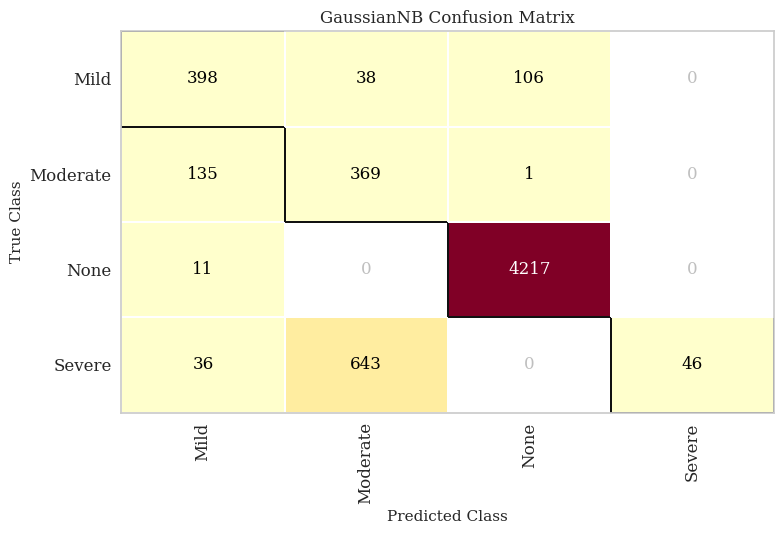

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
confusion = confusion_matrix(modelo, X_test, y_test)
confusion.poof()